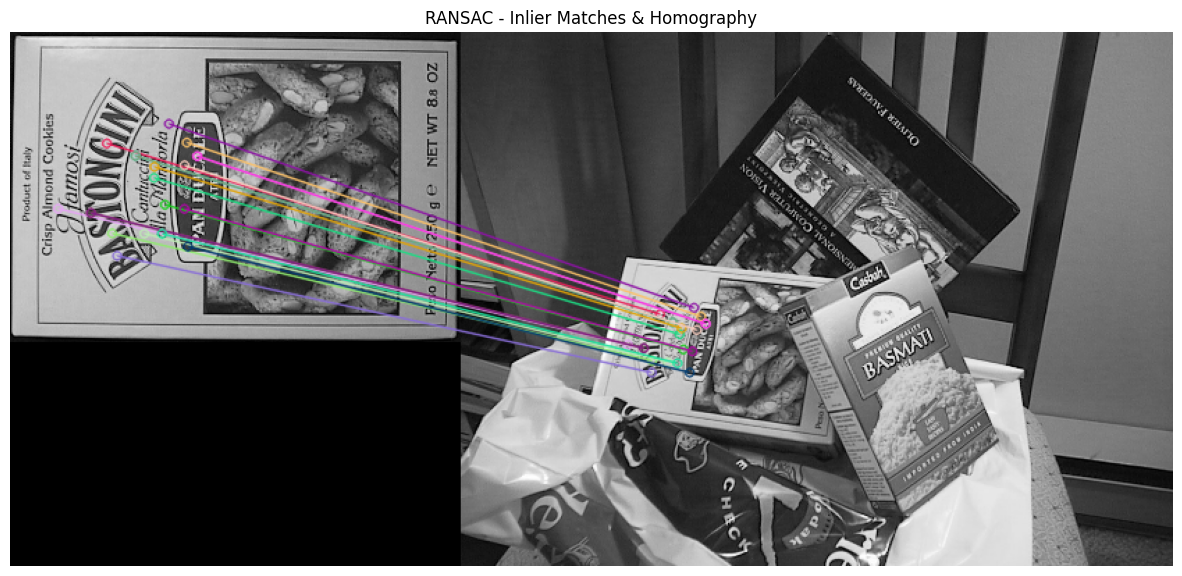

Estimated Homography:
 [[ 4.42477621e-01 -1.63242906e-01  1.18844648e+02]
 [ 1.15364245e-03  4.05117466e-01  1.60919196e+02]
 [-2.43904947e-04 -3.51374227e-04  1.00000000e+00]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

# Use SIFT for initial matching
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

# Apply Lowe’s ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Extract matched points
pts1 = np.float32([kp1[m.queryIdx].pt for m in good])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good])

# Estimate homography with RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
inliers = [m for i, m in enumerate(good) if mask[i]]

# Draw inlier matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, inliers[:20], None, flags=2)

# Show result
plt.figure(figsize=(15, 10))
plt.title("RANSAC - Inlier Matches & Homography")
plt.imshow(matched_img)
plt.axis('off')
plt.show()

# Optional: print transformation matrix
print("Estimated Homography:\n", H)
